In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from textblob import TextBlob
from wordcloud import WordCloud
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("Twitter_tweets.csv")

In [ ]:
df.head()

,id,user,sentiment,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
df.info

<bound method DataFrame.info of          id         user sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                   tweet  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window

In [ ]:
df.isnull().sum()

id             0
user           0
sentiment      0
tweet        686
dtype: int64

In [ ]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   4
Count of rows in the data is:   74682


In [ ]:
df.dtypes

id            int64
user         object
sentiment    object
tweet        object
dtype: object

In [ ]:
df.columns

Index(['id', 'user', 'sentiment', 'tweet'], dtype='object')

In [ ]:
df.shape

(74682, 4)

#Preprocessing the data

In [ ]:
# Drop rows with null values
df = df.dropna()

In [ ]:
df.shape

(73996, 4)

In [ ]:
df.head()

,id,user,sentiment,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
# Stop words Removal
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk_stopwords = set(stopwords.words('english'))
print(nltk_stopwords)

{'him', 'out', 'm', 'do', 'isn', 'whom', 'until', "wouldn't", 'on', 'then', 'with', "weren't", 'haven', "you'll", 'be', 'aren', 'won', 'themselves', 're', 'both', 'yourselves', 'that', "you'd", 'below', 'he', 'about', "should've", 'having', 'over', 'am', 'most', 'y', 'herself', 'they', 'couldn', "hasn't", 'which', "won't", "she's", 'didn', 'the', 'have', 'ain', 'an', 'only', 'or', "shan't", 'while', 'down', 'here', 'she', "isn't", 'himself', 'been', 'each', 'what', 'i', 'very', 'for', 'my', 'you', 'a', "don't", 'ma', 'because', "couldn't", 's', 'than', 'will', 'were', 'few', 'by', 'above', 'before', 'such', 'needn', 'when', 'after', 'there', 'has', "mightn't", 'now', 'our', 'its', 'so', "doesn't", "it's", 'theirs', 'why', 'their', 'at', 'd', 'are', 'further', 'between', 'don', "mustn't", 'against', "you've", 'doing', 'any', 'his', 'yourself', 'as', 'all', 'nor', 'in', 'o', 'hers', 'did', 'her', 'them', 't', 've', "haven't", 'these', 'll', 'does', 'not', 'once', 'to', 'just', 'some', 'w

In [ ]:
len(nltk_stopwords)

179

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords = set(ENGLISH_STOP_WORDS)
print(sklearn_stopwords)

{'out', 'never', 'along', 'see', 'eleven', 'their', 'us', 'must', 'yours', 'themselves', 'less', 'hereupon', 'what', 'until', 'whoever', 'during', 'both', 'but', 'therein', 'somewhere', 'de', 'through', 'namely', 'sometimes', 'even', 'how', 'whenever', 'whence', 'thick', 'under', 'rather', 'serious', 'our', 'upon', 'ten', 'latter', 'find', 'been', 'so', 'therefore', 'beside', 'take', 'by', 'nowhere', 'sincere', 'beforehand', 'ie', 'via', 'between', 'had', 'side', 'there', 'across', 'yourself', 'they', 'moreover', 'also', 'hundred', 'twelve', 'eight', 'hasnt', 'whom', 'no', 'sixty', 'already', 'thru', 'becomes', 'mine', 'all', 'latterly', 'such', 'about', 'couldnt', 'seeming', 'except', 'amount', 'sometime', 'call', 'yet', 'whether', 'noone', 'two', 'keep', 'nobody', 'amoungst', 'etc', 'another', 'although', 'when', 'where', 'amongst', 'eg', 'one', 'and', 'none', 'or', 'could', 'might', 'the', 'anyhow', 'everyone', 'she', 'do', 'whatever', 'per', 'somehow', 'below', 'within', 'toward', 

In [ ]:
len(sklearn_stopwords)

318

In [ ]:
# Find the common stopwords from NLTK & sklearn
print(nltk_stopwords.intersection(sklearn_stopwords))
len(nltk_stopwords.intersection(sklearn_stopwords))

{'him', 'out', 'do', 'whom', 'until', 'on', 'then', 'with', 'be', 'themselves', 're', 'both', 'yourselves', 'that', 'below', 'he', 'about', 'over', 'am', 'most', 'herself', 'they', 'which', 'the', 'have', 'an', 'only', 'or', 'while', 'down', 'here', 'she', 'himself', 'been', 'each', 'what', 'i', 'very', 'for', 'my', 'you', 'a', 'because', 'than', 'will', 'were', 'few', 'by', 'above', 'before', 'such', 'when', 'after', 'there', 'has', 'our', 'its', 'so', 'why', 'their', 'at', 'are', 'further', 'between', 'against', 'any', 'his', 'yourself', 'as', 'all', 'nor', 'in', 'hers', 'her', 'them', 'these', 'not', 'once', 'to', 'some', 'where', 'under', 'during', 'off', 'again', 'can', 'how', 'this', 'itself', 'no', 'into', 'who', 'if', 'other', 'was', 'it', 'too', 'myself', 'same', 'from', 'through', 'we', 'ours', 'should', 'of', 'had', 'but', 'and', 'own', 'being', 'yours', 'more', 'ourselves', 'is', 'me', 'up', 'those', 'your', 'now'}


119

In [ ]:
# Combining the stopwords from sklearn & NLTK
combined_stopwords = nltk_stopwords.union(sklearn_stopwords)
len(combined_stopwords)

378

In [ ]:
# Text Normalization: Stemming or Lemmatization (prefer)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
!pip install contractions

In [ ]:
import contractions

In [ ]:
def clean_tweets(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)
    new_text = new_text.lower().strip()

    new_text = [token for token in new_text.split() if token not in combined_stopwords]

    new_text = [token for token in new_text if len(token)>2]

    cleaned_text = ''
    for token in new_text:
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '

    return cleaned_text

In [ ]:
# Convert the 'tweet' column values to strings
df['tweet'] = df['tweet'].astype(str)

In [ ]:
# Apply the clean_tweets function to the 'tweet' column and create a new 'Tweets' column
df['Tweets'] = df['tweet'].apply(clean_tweets)

In [ ]:
# Display the modified DataFrame
df.head()

,id,user,sentiment,tweet,Tweets
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,getting borderland murder
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming border kill
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,getting borderland kill
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,coming borderland murder
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,getting borderland murder


#Processing the tweets:

In [ ]:
#creating a function to get the subjectivity:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

In [ ]:
#creating a function to get the polarity:
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
#creating two new columns to store the subjectivity and polarity:
df['Subjectivity']= df['Tweets'].apply(getSubjectivity)
df['Polarity']= df['Tweets'].apply(getPolarity)

In [ ]:
#Showing the new dataframe with new columns of Subjectivity and Polarity:
df

,id,user,sentiment,tweet,Tweets,Subjectivity,Polarity
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,getting borderland murder,0.0,0.0
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming border kill,0.0,0.0
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,getting borderland kill,0.0,0.0
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,coming borderland murder,0.0,0.0
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,getting borderland murder,0.0,0.0
...,...,...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,realized window partition mac like year nvidia...,0.0,0.0
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,realized mac window partition year nvidia driv...,0.0,0.0
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,realized window partition mac year nvidia driv...,0.0,0.0
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,realized window partition mac like year nvidia...,0.8,-0.6


In [ ]:
#Create a function to compute the negative ,positive and neutral analysis:
def getAnalysis(score):
  if score < 0:
    return "Negative"
  elif score == 0:
    return "Neutral"
  else:
    return "Positive"

In [ ]:
#Applying the function:
df['Analysis'] = df["Polarity"].apply(getAnalysis)

In [ ]:
#showing the data
df

,id,user,sentiment,tweet,Tweets,Subjectivity,Polarity,Analysis
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,getting borderland murder,0.0,0.0,Neutral
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming border kill,0.0,0.0,Neutral
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,getting borderland kill,0.0,0.0,Neutral
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,coming borderland murder,0.0,0.0,Neutral
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,getting borderland murder,0.0,0.0,Neutral
...,...,...,...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,realized window partition mac like year nvidia...,0.0,0.0,Neutral
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,realized mac window partition year nvidia driv...,0.0,0.0,Neutral
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,realized window partition mac year nvidia driv...,0.0,0.0,Neutral
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,realized window partition mac like year nvidia...,0.8,-0.6,Negative


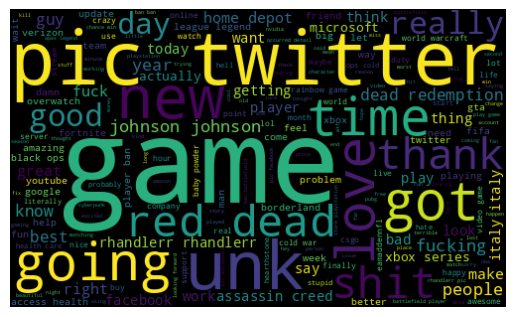

In [ ]:
#Plot the Word Cloud
all_words = " ".join([sentence for sentence in df['Tweets']])

wordCloud = WordCloud(width=500,height=300, random_state= 21, max_font_size=119).generate(all_words)
plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis("off")
plt.show()

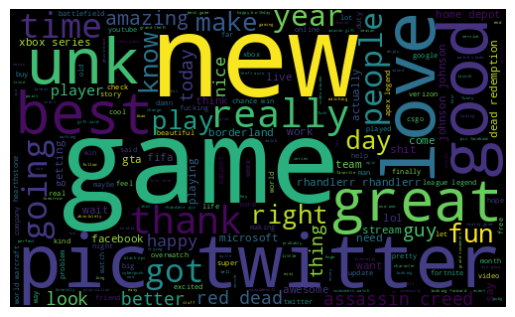

In [ ]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['Tweets'][df['Analysis']== "Positive"]])

wordcloud = WordCloud(width= 500, height=300, random_state=21, max_font_size=119).generate(all_words)

# plot the graph

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

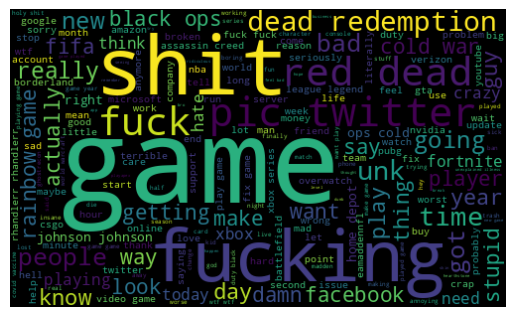

In [ ]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['Tweets'][df['Analysis']== "Negative"]])

wordcloud = WordCloud(width= 500, height=300, random_state=21, max_font_size=119).generate(all_words)

# plot the graph

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#Print all of the Positive tweets:
count=1
positive_tweets = df[df['Analysis'] == 'Positive']
print("Positive Tweets:")
for tweet in positive_tweets['Tweets']:
    print(str(count) + ')' + tweet)
    print()
    count=count+1

Streaming output truncated to the last 5000 lines.
29103)enjoy dystopian corporate future refreshing taste rockstar energy 

29104)enjoy dystopian corporatocratic future refreshing taste rockstar energy 

29105)enjoy investigating dystopian corporatocratic alternative future refreshing taste unk free energy 

29106)enjoy exciting corporatocratic future refreshing taste rockstartm entertainment 

29107)cyberpunk getting delayed fit kind extra ngl 

29108)cyberpunk delayed live 

29109)punk postponed fit 

29110)cyberpunk getting delayed fit kind extra ngl 

29111)cyberpunk getting delayed fit kind extra ngl 

29112)cyberpunk getting edited fit kind extra ngl 

29113)really suck saying projekt red longer want 

29114)wow 

29115)wow 

29116)wow 

29117)wow 

29118)wow 

29119)wow 

29120)cyberpunk lore voodoo boy like gang cdpr evolved ritual magic counterpart maman brigitte interesting character 

29121)cyberpunk lore voodoo boy like gang cdpr developed ritual magical counterpart maman 

In [ ]:
#Print all of the Negativetweets:
count=1
negative_tweets = df[df['Analysis'] == 'Negative']
print("Negative Tweets:")
for tweet in negative_tweets['Tweets']:
    print(str(count) + ')' + tweet)
    print()
    count=count+1

Streaming output truncated to the last 5000 lines.
19218)david odell disgusting disgusting spin display nfl rarely seen rethink particular statement 

19219)odell disgusting spin display nfl unk seen rethink particular statement 

19220)make worst game 

19221)eamaddennfl play worse game nba 

19222)eamaddennfl make worse game 

19223)make worst game score 

19224)firstly make good worst game 

19225)make worst dog 

19226)game shit 

19227)eamaddennfl game shit 

19228)eamaddennfl game shit 

19229)game shit 

19230)basketball game shit 

19231)game simply 

19232)madden ruined game guy dead end leader telling shaq barrett guy want better espn 

19233)madden ruining game dude leader sack tell shaq barrett guy want 

19234)sad 

19235)maddenleagueops maddennfldirect sad 

19236)maddenleagueops maddenndirect sad 

19237)unk sad 

19238)sad 

19239)hate 

19240)hate eamaddennfl 

19241)hate eamaddennfl 

19242)hate cat 

19243)maybe hate john 

19244)mean hate 

19245)richie incognito bu

In [ ]:
#Print all of the Neutral tweets:
count=1
neutral_tweets = df[df['Analysis'] == 'Neutral']
print("Neutral Tweets:")
for tweet in neutral_tweets['Tweets']:
    print(str(count) + ')' + tweet)
    print()
    count=count+1

Streaming output truncated to the last 5000 lines.
18178)

18179)lawsuit cancer 

18180)case cancer 

18181)lawsuit cancer 

18182)lawsuit 

18183)lawsuit child cancer 

18184)lawsuit left cancer 

18185)sale decline canada cancer claim company decides victimize people world 

18186)decline sale canada cancer cause company choose harass people world 

18187)slower sale canada cancer claim 

18188)sale decline canada cancer issue company decides victimize people world 

18189)sale decline canada especially cancer claim company decides victimize people world 

18190)sale went overseas cancer use company decides victimize people world 

18191)johnson johnson fourth 

18192)johnson johnson finish fourth 

18193)johnson johnson fourth 

18194)johnson johnson fourth 

18195)johnson johnson fourth 

18196)johnson johnson fourth 

18197)big chunk insight result overhead lnkd 

18198)lie like 

18199)lying 

18200)lying 

18201)lie 

18202)lie like 

18203)lie 

18204)johnson johnson announced 

In [ ]:
# Count the sentiment analysis results
sentiment_counts = df['Analysis'].value_counts()

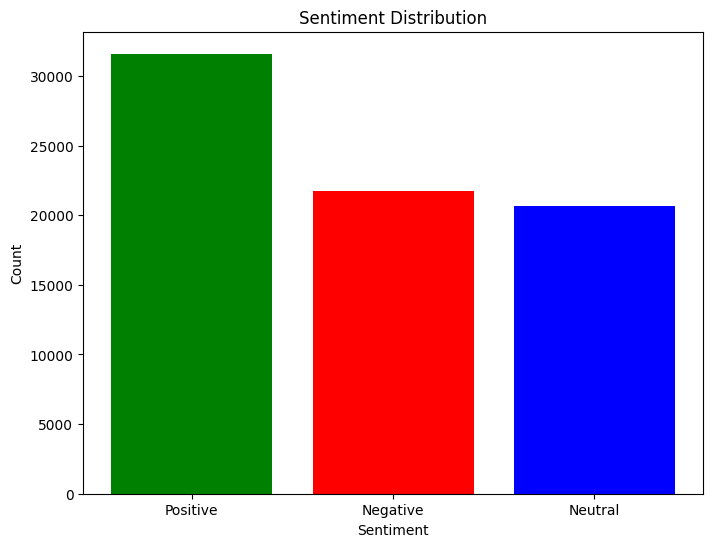

In [ ]:
#bar plot of analysis:
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])

plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
# Count the number of tweets in each sentiment category
positive_count = len(df[df['Analysis'] == 'Positive'])
neutral_count = len(df[df['Analysis'] == 'Neutral'])
negative_count = len(df[df['Analysis'] == 'Negative'])

# Create data for the pie chart
labels = ['Positive', 'Neutral', 'Negative']
sizes = [positive_count, neutral_count, negative_count]
colors = ['lightgreen', 'lightblue', 'lightcoral']

# To explode the positive slice
explode = (0.1, 0, 0)


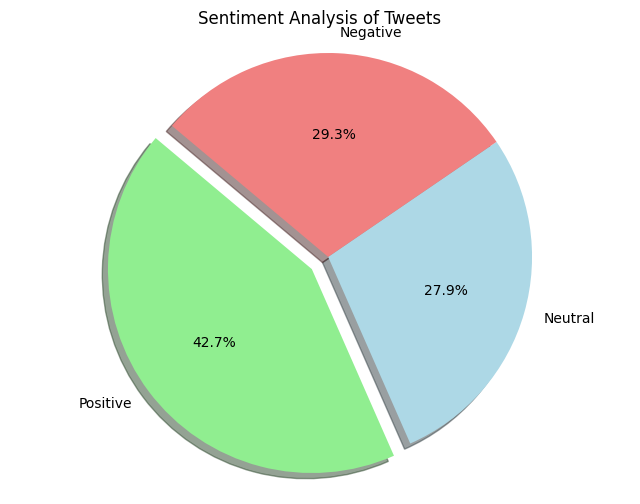

In [ ]:
# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Sentiment Analysis of Tweets')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# Showing the pie chart
plt.show()



In [ ]:
#To separate the positive and negative tweets:
positive_tweets = df[df['Analysis'] == 'Positive']['Tweets']
negative_tweets = df[df['Analysis'] == 'Negative']['Tweets']


In [ ]:
#To concat the positive and negative tweets in one column:
concatenated_tweets = pd.concat([positive_tweets, negative_tweets], ignore_index=True)

In [ ]:
# Print the concatenated tweets
print(concatenated_tweets)

0        spent hour making fun know huge fan maya favor...
1        spent couple hour fun know huge borderland fan...
2        spent hour fun know huge borderland fan maya f...
3        spent hour making fun know huge rhandlerr fan ...
4        spent hour making fun know huge rhandlerr fan ...
                               ...                        
53314    checked new gpu driver today typed amd driver ...
53315    checked new gpu powered driver today went amd ...
53316    checked new gpu driver today clicked amd drive...
53317          really look bad way net com google challen 
53318    realized window partition mac like year nvidia...
Name: Tweets, Length: 53319, dtype: object


In [ ]:
# Create labels for positive and negative tweets
labels = [1] * len(positive_tweets) + [0] * len(negative_tweets)

In [ ]:
# Create a new DataFrame with the concatenated tweets and labels
concatenated_df = pd.DataFrame({'Tweets': concatenated_tweets, 'Label': labels})

In [ ]:
# Print the DataFrame with labels
print(concatenated_df)

                                                  Tweets  Label
0      spent hour making fun know huge fan maya favor...      1
1      spent couple hour fun know huge borderland fan...      1
2      spent hour fun know huge borderland fan maya f...      1
3      spent hour making fun know huge rhandlerr fan ...      1
4      spent hour making fun know huge rhandlerr fan ...      1
...                                                  ...    ...
53314  checked new gpu driver today typed amd driver ...      0
53315  checked new gpu powered driver today went amd ...      0
53316  checked new gpu driver today clicked amd drive...      0
53317        really look bad way net com google challen       0
53318  realized window partition mac like year nvidia...      0

[53319 rows x 2 columns]


# Split the data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
X = concatenated_df['Tweets']
y = concatenated_df['Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (42655,) (42655,)
Testing data shape: (10664,) (10664,)


In [ ]:
#transforming the Data using TF-IDF Vectorizer (Term Frequency-Inverse Document Frequency)
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating a TF-IDF vectorizer
vectoriser = TfidfVectorizer(max_features=74000)

# Fit the vectorizer on the training text data
vectoriser.fit(X_train)


TfidfVectorizer(max_features=74000)

In [ ]:
#Transforming the dataset uding TF-IDF Vectorization:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Evaluating the model:
def evaluating_model(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    c_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    c_names = ['True Negative','False Positive', 'False Negative','True Positive']
    c_percentages = ['{0:.2%}'.format(value) for value in c_matrix.flatten() / np.sum(c_matrix)]
    labels = [f'{c1}\n{c2}' for c1, c2 in zip(c_names, c_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(c_matrix, annot = labels, cmap = 'Reds',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict={'size':13}, labelpad=12)
    plt.ylabel("Actual values", fontdict={'size':13}, labelpad=12)
    plt.title("Confusion Matrix", fontdict={'size':17}, pad=20)


In [ ]:
from sklearn.metrics import accuracy_score

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4364
           1       0.95      0.91      0.93      6300

    accuracy                           0.92     10664
   macro avg       0.91      0.92      0.92     10664
weighted avg       0.92      0.92      0.92     10664

Accuracy of Bernoulli Naive Bayes model: 91.84%


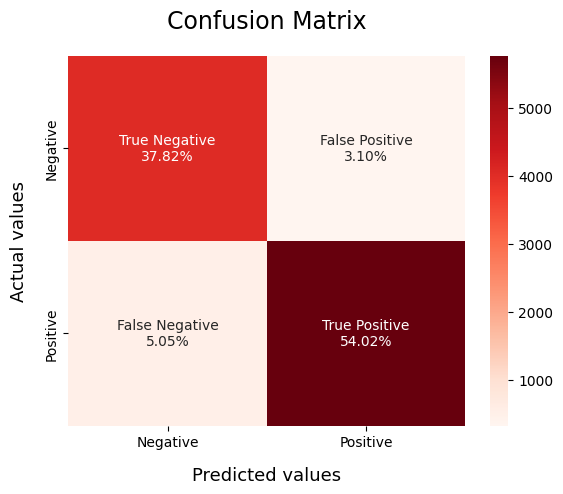

In [ ]:
from sklearn.naive_bayes import BernoulliNB
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
evaluating_model(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)
accuracy_BNB = accuracy_score(y_test, y_pred1)
print(f"Accuracy of Bernoulli Naive Bayes model: {accuracy_BNB:.2%}")


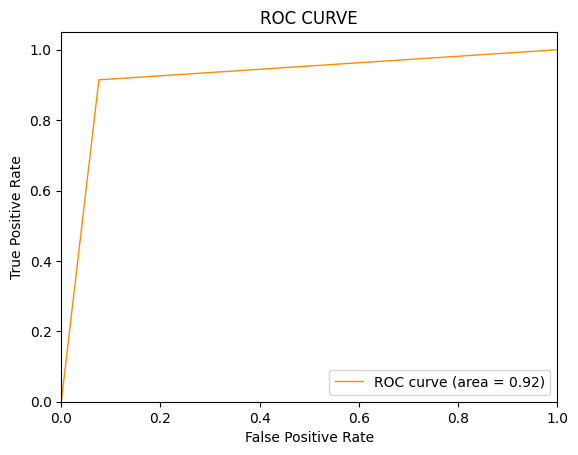

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4364
           1       0.98      0.98      0.98      6300

    accuracy                           0.97     10664
   macro avg       0.97      0.97      0.97     10664
weighted avg       0.97      0.97      0.97     10664

Accuracy of LinearSVC model: 97.40%


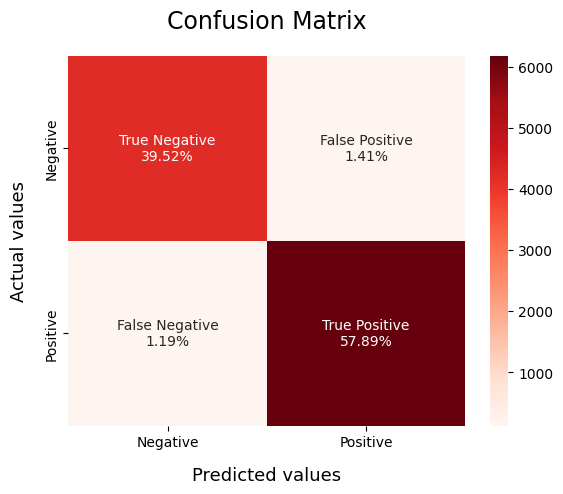

In [ ]:
from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
evaluating_model(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)
accuracy_SVC = accuracy_score(y_test, y_pred2)
print(f"Accuracy of LinearSVC model: {accuracy_SVC:.2%}")


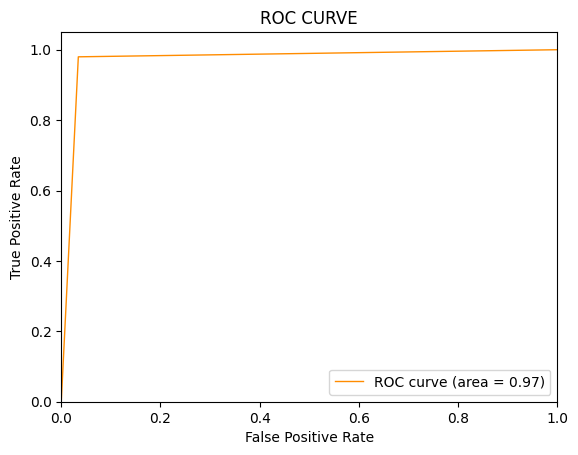

In [ ]:
from sklearn.metrics import roc_curve, auc #Receiver Operating Characteristic
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')#ratio of incorrectly predicted positive instances
plt.ylabel('True Positive Rate') #ratio correctly predicted positive instances (true positives) to the total actual positive instances
plt.title('ROC CURVE')#auc area under the curve
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      4364
           1       0.97      0.97      0.97      6300

    accuracy                           0.97     10664
   macro avg       0.97      0.96      0.96     10664
weighted avg       0.97      0.97      0.97     10664

Accuracy of Logistic Regression model: 96.57%


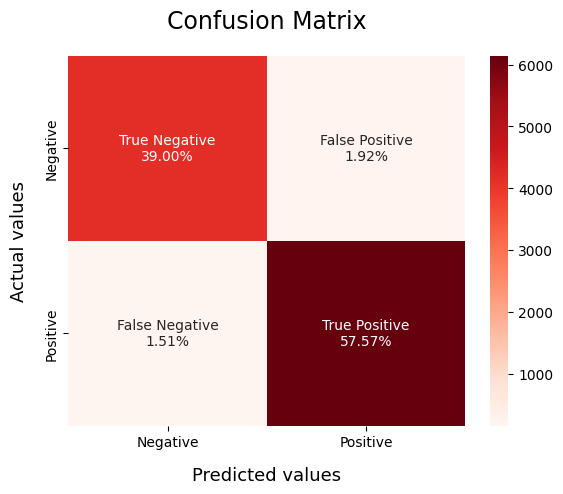

In [ ]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)#C is the inverse regularization strength
LRmodel.fit(X_train, y_train)
evaluating_model(LRmodel)
y_pred3 = LRmodel.predict(X_test)
accuracy_LR = accuracy_score(y_test, y_pred3)
print(f"Accuracy of Logistic Regression model: {accuracy_LR:.2%}")

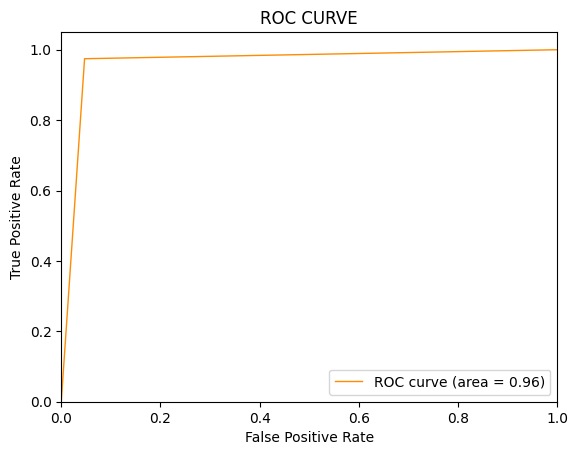

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [ ]:
df

,id,user,sentiment,tweet,Tweets,Subjectivity,Polarity,Analysis
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,getting borderland murder,0.0,0.0,Neutral
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming border kill,0.0,0.0,Neutral
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,getting borderland kill,0.0,0.0,Neutral
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,coming borderland murder,0.0,0.0,Neutral
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,getting borderland murder,0.0,0.0,Neutral
...,...,...,...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,realized window partition mac like year nvidia...,0.0,0.0,Neutral
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,realized mac window partition year nvidia driv...,0.0,0.0,Neutral
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,realized window partition mac year nvidia driv...,0.0,0.0,Neutral
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,realized window partition mac like year nvidia...,0.8,-0.6,Negative


In [ ]:
# Group by user and count the number of tweets
user_tweet_counts = df['user'].value_counts()

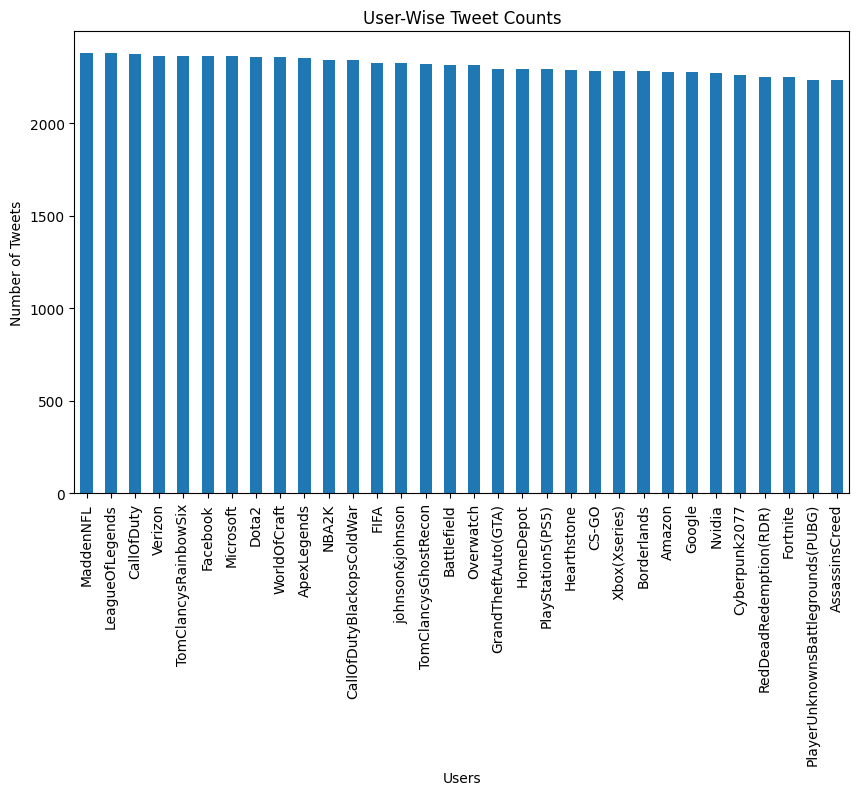

In [ ]:
# Define custom colors for each user (in the same order as the users appear)
#custom_colors = ['red', 'blue', 'green', 'orange', 'purple']

# Create a bar chart
user_tweet_counts.plot(kind='bar', figsize=(10, 6) )

# Add labels and title
plt.xlabel('Users')
plt.ylabel('Number of Tweets')
plt.title('User-Wise Tweet Counts')

# Show the plot
plt.show()

In [ ]:
# Assuming you have a 'user' column in your DataFrame, replace 'user_column_name' with the actual column name.
user_tweets = df.groupby('user')['Analysis'].value_counts().unstack()

# This will give you a DataFrame with user-wise counts of Positive and Negative tweets.
print(user_tweets)

Analysis                           Negative  Neutral  Positive
user                                                          
Amazon                                  448      638      1190
ApexLegends                             679      646      1028
AssassinsCreed                          502      429      1303
Battlefield                             424      943       949
Borderlands                             593      473      1214
CS-GO                                   675      542      1067
CallOfDuty                              900      507       969
CallOfDutyBlackopsColdWar               891      617       835
Cyberpunk2077                           577      614      1071
Dota2                                   676      672      1011
FIFA                                    868      611       845
Facebook                                788      709       865
Fortnite                                773      589       887
Google                                  606      677   

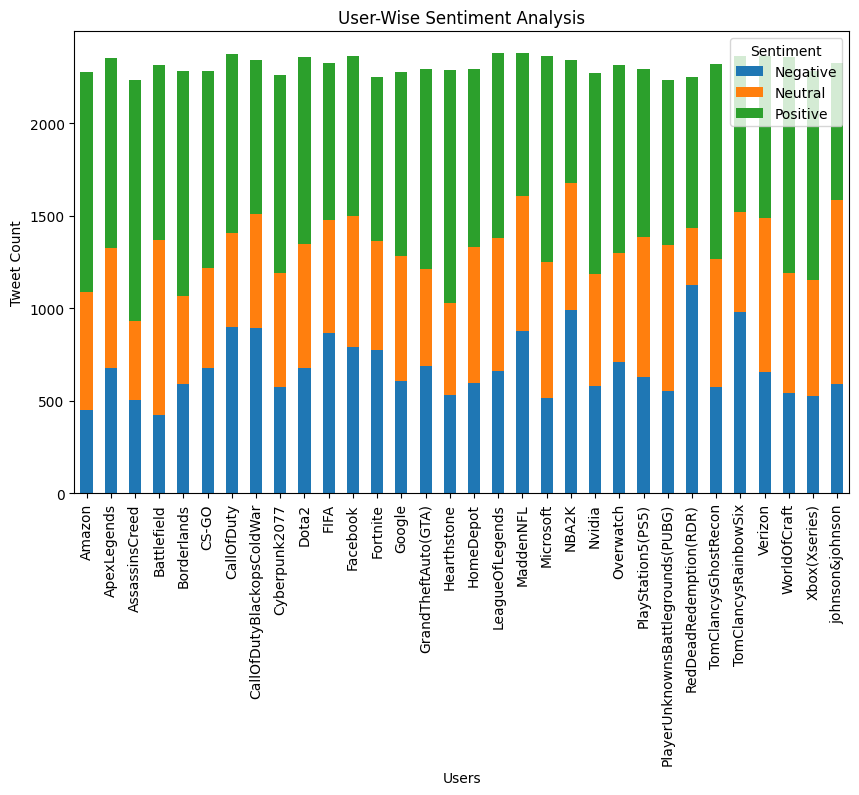

In [ ]:
# Create a stacked bar chart
user_tweets.plot(kind='bar', stacked=True, figsize=(10, 6))
# Add labels and title
plt.xlabel('Users')
plt.ylabel('Tweet Count')
plt.title('User-Wise Sentiment Analysis')
# Show the legend
plt.legend(title='Sentiment', loc='upper right')
# Show the plot
plt.show()


In [ ]:
Users= "Amazon,ApexLegends,AssassinsCreed,Battlefield,Borderlands,CallOfDuty,CallOfDutyBlackopsColdWar,CS-GO,Cyberpunk2077,Dota2,Facebook,FIFA,Fortnite,Google,GrandTheftAuto(GTA),Hearthstone,Overwatch,Xbox(Xseries),NBA2K,PlayStation5(PS5),WorldOfCraft,ApexLegends,LeagueOfLegends,Microsoft,PlayerUnknownsBattlegrounds(PUBG),Verizon,HomeDepot,RedDeadRedemption(RDR),TomClancysRainbowSix,MaddenNFL,johnson&johnson,TomClancysGhostRecon,Nvidia"

In [ ]:
# Split the string by commas to create a list
Users_list = Users.split(',')
print(Users_list)


['Amazon', 'ApexLegends', 'AssassinsCreed', 'Battlefield', 'Borderlands', 'CallOfDuty', 'CallOfDutyBlackopsColdWar', 'CS-GO', 'Cyberpunk2077', 'Dota2', 'Facebook', 'FIFA', 'Fortnite', 'Google', 'GrandTheftAuto(GTA)', 'Hearthstone', 'Overwatch', 'Xbox(Xseries)', 'NBA2K', 'PlayStation5(PS5)', 'WorldOfCraft', 'ApexLegends', 'LeagueOfLegends', 'Microsoft', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon', 'HomeDepot', 'RedDeadRedemption(RDR)', 'TomClancysRainbowSix', 'MaddenNFL', 'johnson&johnson', 'TomClancysGhostRecon', 'Nvidia']


In [ ]:
#creating a dataframe
df_users = pd.DataFrame({'User': Users_list})

In [ ]:
df_users.head()

,User
0,Amazon
1,ApexLegends
2,AssassinsCreed
3,Battlefield
4,Borderlands


In [ ]:
# Create a dictionary to map users to categories
user_category_mapping = {
    'ApexLegends': 'Video Games',
    'AssassinsCreed': 'Video Games',
    'Battlefield': 'Video Games',
    'Borderlands': 'Video Games',
    'CallOfDuty': 'Video Games',
    'CallOfDutyBlackopsColdWar': 'Video Games',
    'CS-GO': 'Video Games',
    'Cyberpunk2077': 'Video Games',
    'Dota2': 'Video Games',
    'Fortnite': 'Video Games',
    'GrandTheftAuto(GTA)': 'Video Games',
    'Hearthstone': 'Video Games',
    'Overwatch': 'Video Games',
    'NBA2K': 'Video Games',
    'PlayerUnknownsBattlegrounds(PUBG)': 'Video Games',
    'RedDeadRedemption(RDR)': 'Video Games',
    "TomClancysRainbowSix": 'Video Games',
    'MaddenNFL': 'Video Games',
    'Xbox(Xseries)': 'Gaming Platforms',
    'PlayStation5(PS5)': 'Gaming Platforms',
    'WorldOfCraft': 'Gaming Platforms',
    'LeagueOfLegends':'Video Games',
    'Amazon': 'Technology Companies',
    'Google': 'Technology Companies',
    'Microsoft': 'Technology Companies',
    'Nvidia': 'Technology Companies',
    'johnson&johnson': 'Healthcare and Pharmaceuticals',
    'TomClancysGhostRecon':'Video Games',
    'HomeDepot': 'Retail and Home Improvement',
    'Facebook': 'Social Media and Communication',
    'Verizon': 'Social Media and Communication',
    'FIFA': 'Sports'

}

# Map users to categories and create a new 'Category' column
df_users['Category'] = df_users['User'].map(user_category_mapping)

# Display the DataFrame with categories
print(df_users)


                                 User                        Category
0                              Amazon            Technology Companies
1                         ApexLegends                     Video Games
2                      AssassinsCreed                     Video Games
3                         Battlefield                     Video Games
4                         Borderlands                     Video Games
5                          CallOfDuty                     Video Games
6           CallOfDutyBlackopsColdWar                     Video Games
7                               CS-GO                     Video Games
8                       Cyberpunk2077                     Video Games
9                               Dota2                     Video Games
10                           Facebook  Social Media and Communication
11                               FIFA                          Sports
12                           Fortnite                     Video Games
13                  

In [ ]:
# Filter the DataFrame to see only the items in the "Technology Companies" category
technology_companies = df_users[df_users['Category'] == 'Technology Companies']

# Display the filtered DataFrame
print(technology_companies)


         User              Category
0      Amazon  Technology Companies
13     Google  Technology Companies
23  Microsoft  Technology Companies
32     Nvidia  Technology Companies


In [ ]:
df

,id,user,sentiment,tweet,Tweets,Subjectivity,Polarity,Analysis
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,getting borderland murder,0.0,0.0,Neutral
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming border kill,0.0,0.0,Neutral
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,getting borderland kill,0.0,0.0,Neutral
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,coming borderland murder,0.0,0.0,Neutral
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,getting borderland murder,0.0,0.0,Neutral
...,...,...,...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,realized window partition mac like year nvidia...,0.0,0.0,Neutral
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,realized mac window partition year nvidia driv...,0.0,0.0,Neutral
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,realized window partition mac year nvidia driv...,0.0,0.0,Neutral
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,realized window partition mac like year nvidia...,0.8,-0.6,Negative


In [ ]:
df = df.merge(df_users[['User', 'Category']], left_on='user', right_on='User', how='left')

In [ ]:
df=df.drop(columns=['user'])

In [ ]:
df

,id,sentiment,tweet,Tweets,Subjectivity,Polarity,Analysis,User,Category
0,2401,Positive,im getting on borderlands and i will murder yo...,getting borderland murder,0.0,0.0,Neutral,Borderlands,Video Games
1,2401,Positive,I am coming to the borders and I will kill you...,coming border kill,0.0,0.0,Neutral,Borderlands,Video Games
2,2401,Positive,im getting on borderlands and i will kill you ...,getting borderland kill,0.0,0.0,Neutral,Borderlands,Video Games
3,2401,Positive,im coming on borderlands and i will murder you...,coming borderland murder,0.0,0.0,Neutral,Borderlands,Video Games
4,2401,Positive,im getting on borderlands 2 and i will murder ...,getting borderland murder,0.0,0.0,Neutral,Borderlands,Video Games
...,...,...,...,...,...,...,...,...,...
76344,9200,Positive,Just realized that the Windows partition of my...,realized window partition mac like year nvidia...,0.0,0.0,Neutral,Nvidia,Technology Companies
76345,9200,Positive,Just realized that my Mac window partition is ...,realized mac window partition year nvidia driv...,0.0,0.0,Neutral,Nvidia,Technology Companies
76346,9200,Positive,Just realized the windows partition of my Mac ...,realized window partition mac year nvidia driv...,0.0,0.0,Neutral,Nvidia,Technology Companies
76347,9200,Positive,Just realized between the windows partition of...,realized window partition mac like year nvidia...,0.8,-0.6,Negative,Nvidia,Technology Companies


In [ ]:
new_order = ['User'] + [col for col in df.columns if col != 'User']
df = df[new_order]

# Display the updated DataFrame
df

,User,id,sentiment,tweet,Tweets,Subjectivity,Polarity,Analysis,Category
0,Borderlands,2401,Positive,im getting on borderlands and i will murder yo...,getting borderland murder,0.0,0.0,Neutral,Video Games
1,Borderlands,2401,Positive,I am coming to the borders and I will kill you...,coming border kill,0.0,0.0,Neutral,Video Games
2,Borderlands,2401,Positive,im getting on borderlands and i will kill you ...,getting borderland kill,0.0,0.0,Neutral,Video Games
3,Borderlands,2401,Positive,im coming on borderlands and i will murder you...,coming borderland murder,0.0,0.0,Neutral,Video Games
4,Borderlands,2401,Positive,im getting on borderlands 2 and i will murder ...,getting borderland murder,0.0,0.0,Neutral,Video Games
...,...,...,...,...,...,...,...,...,...
76344,Nvidia,9200,Positive,Just realized that the Windows partition of my...,realized window partition mac like year nvidia...,0.0,0.0,Neutral,Technology Companies
76345,Nvidia,9200,Positive,Just realized that my Mac window partition is ...,realized mac window partition year nvidia driv...,0.0,0.0,Neutral,Technology Companies
76346,Nvidia,9200,Positive,Just realized the windows partition of my Mac ...,realized window partition mac year nvidia driv...,0.0,0.0,Neutral,Technology Companies
76347,Nvidia,9200,Positive,Just realized between the windows partition of...,realized window partition mac like year nvidia...,0.8,-0.6,Negative,Technology Companies


In [ ]:
from google.colab import files
df.to_csv('newtwitter.csv', index=False)
files.download('newtwitter.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from collections import Counter

In [ ]:


def find_most_frequent_words_in_category(df, category, user_name, top_n):

    # Step 1: Filter to get only the specified category
    category_df = df[df['Category'] == category]

    # Step 2: Extract the list of users in the specified category
    users_in_category = category_df[category_df['User'] == user_name]['User'].tolist()

    # Step 3: Combine the tweets of users in the specified category into one text
    category_tweets = ' '.join(df[df['User'].isin(users_in_category)]['Tweets'])

    # Step 4: Tokenize the text into words
    words = category_tweets.split()

    # Step 5: Count word frequencies
    word_freq = Counter(words)

    # Step 6: Get the most common words
    most_common_words = word_freq.most_common(top_n)

    return most_common_words





In [ ]:
most_frequent_words = find_most_frequent_words_in_category(df, 'Technology Companies', 'Amazon', top_n=50)

In [ ]:
print(most_frequent_words)

[('amazon', 1925), ('com', 498), ('win', 275), ('chance', 264), ('card', 192), ('video', 188), ('play', 185), ('day', 177), ('watch', 176), ('free', 169), ('gift', 168), ('game', 163), ('unit', 153), ('retweet', 143), ('summoners', 142), ('thanks', 139), ('grand', 129), ('try', 125), ('exciting', 122), ('prime', 121), ('quiz', 119), ('interesting', 115), ('book', 114), ('entering', 113), ('unk', 112), ('share', 112), ('played', 111), ('reward', 110), ('luck', 109), ('time', 106), ('new', 98), ('love', 95), ('order', 93), ('global', 93), ('best', 93), ('people', 87), ('shit', 84), ('pic', 81), ('great', 80), ('buy', 79), ('twitter', 77), ('google', 75), ('know', 74), ('good', 72), ('thank', 71), ('everyday', 70), ('today', 69), ('read', 69), ('amzn', 68), ('really', 67)]


In [ ]:


def analyze_tweets_by_frequency(most_frequent_words, df):
    # Extract positive and negative tweets separately
    positive_tweets = df[df['Analysis'] == 'Positive']['Tweets']
    negative_tweets = df[df['Analysis'] == 'Negative']['Tweets']

    # Tokenize positive and negative tweets into words
    positive_words = ' '.join(positive_tweets).split()
    negative_words = ' '.join(negative_tweets).split()

    # Create a dictionary to store the word frequencies in positive and negative tweets
    word_frequencies = {
        'Positive': Counter(positive_words),
        'Negative': Counter(negative_words)
    }

    # Initialize a dictionary to store the frequencies of most frequent words
    most_frequent_word_frequencies = {word: {'Positive': 0, 'Negative': 0} for word, _ in most_frequent_words}

    # Count the occurrences of each word in positive and negative tweets
    for word, freq in most_frequent_words:
        most_frequent_word_frequencies[word]['Positive'] = word_frequencies['Positive'][word]
        most_frequent_word_frequencies[word]['Negative'] = word_frequencies['Negative'][word]

    # Print the frequencies of most frequent words in positive and negative tweets
    for word, freqs in most_frequent_word_frequencies.items():
        print(f"Word: {word}, Positive Frequency: {freqs['Positive']}, Negative Frequency: {freqs['Negative']}")
        return most_frequent_word_frequencies





In [ ]:
words=analyze_tweets_by_frequency(most_frequent_words, df)

Word: amazon, Positive Frequency: 1270, Negative Frequency: 452


In [ ]:
print(words)

{'amazon': {'Positive': 1270, 'Negative': 452}, 'com': {'Positive': 4728, 'Negative': 2554}, 'win': {'Positive': 1106, 'Negative': 85}, 'chance': {'Positive': 384, 'Negative': 56}, 'card': {'Positive': 516, 'Negative': 283}, 'video': {'Positive': 1005, 'Negative': 426}, 'play': {'Positive': 1708, 'Negative': 1553}, 'day': {'Positive': 1320, 'Negative': 767}, 'watch': {'Positive': 813, 'Negative': 322}, 'free': {'Positive': 818, 'Negative': 93}, 'gift': {'Positive': 205, 'Negative': 12}, 'game': {'Positive': 3839, 'Negative': 7436}, 'unit': {'Positive': 158, 'Negative': 13}, 'retweet': {'Positive': 176, 'Negative': 2}, 'summoners': {'Positive': 142, 'Negative': 0}, 'thanks': {'Positive': 1301, 'Negative': 150}, 'grand': {'Positive': 369, 'Negative': 11}, 'try': {'Positive': 348, 'Negative': 208}, 'exciting': {'Positive': 310, 'Negative': 27}, 'prime': {'Positive': 106, 'Negative': 16}, 'quiz': {'Positive': 121, 'Negative': 16}, 'interesting': {'Positive': 460, 'Negative': 22}, 'book': {

In [ ]:
# List of specific words that we want to analyze
specific_words = "twitter,google,order,reward,gift,amazon,shit,best,love,quiz,prime,free"

In [ ]:
specific_words_list = specific_words.split(',')
print(specific_words)

twitter,google,order,reward,gift,amazon,shit,best,love,quiz,prime,free


In [ ]:
print(specific_words_list )

['twitter', 'google', 'order', 'reward', 'gift', 'amazon', 'shit', 'best', 'love', 'quiz', 'prime', 'free']


In [ ]:
specific_words_list = ['twitter', 'google', 'order', 'reward', 'gift', 'amazon', 'shit', 'best', 'love', 'quiz', 'prime', 'free']

In [ ]:
# Initialize dictionaries to store positive and negative frequencies
positive_frequencies = {}
negative_frequencies = {}

# Iterate through the specific words list and look up their frequencies
for word in specific_words_list:
    positive_frequency = words.get(word, {}).get('Positive', 0)
    negative_frequency = words.get(word, {}).get('Negative', 0)

    # Store the frequencies in the dictionaries
    positive_frequencies[word] = positive_frequency
    negative_frequencies[word] = negative_frequency

# Print the positive and negative frequencies for each specific word
for word in specific_words_list:
    print(f"Word: {word}, Positive Frequency: {positive_frequencies[word]}, Negative Frequency: {negative_frequencies[word]}")



Word: twitter, Positive Frequency: 2029, Negative Frequency: 1310
Word: google, Positive Frequency: 921, Negative Frequency: 625
Word: order, Positive Frequency: 197, Negative Frequency: 160
Word: reward, Positive Frequency: 236, Negative Frequency: 53
Word: gift, Positive Frequency: 205, Negative Frequency: 12
Word: amazon, Positive Frequency: 1270, Negative Frequency: 452
Word: shit, Positive Frequency: 630, Negative Frequency: 2207
Word: best, Positive Frequency: 2544, Negative Frequency: 75
Word: love, Positive Frequency: 3172, Negative Frequency: 330
Word: quiz, Positive Frequency: 121, Negative Frequency: 16
Word: prime, Positive Frequency: 106, Negative Frequency: 16
Word: free, Positive Frequency: 818, Negative Frequency: 93


In [ ]:
# Create a DataFrame using a dictionary comprehension
df_frequencies_amazon = pd.DataFrame({
    'Word': specific_words_list,
    'Positive Frequency': [words.get(word, {}).get('Positive', 0) for word in specific_words_list],
    'Negative Frequency': [words.get(word, {}).get('Negative', 0) for word in specific_words_list]
})



In [ ]:
# Display the resulting DataFrame
print(df_frequencies_amazon)

       Word  Positive Frequency  Negative Frequency
0   twitter                2029                1310
1    google                 921                 625
2     order                 197                 160
3    reward                 236                  53
4      gift                 205                  12
5    amazon                1270                 452
6      shit                 630                2207
7      best                2544                  75
8      love                3172                 330
9      quiz                 121                  16
10    prime                 106                  16
11     free                 818                  93


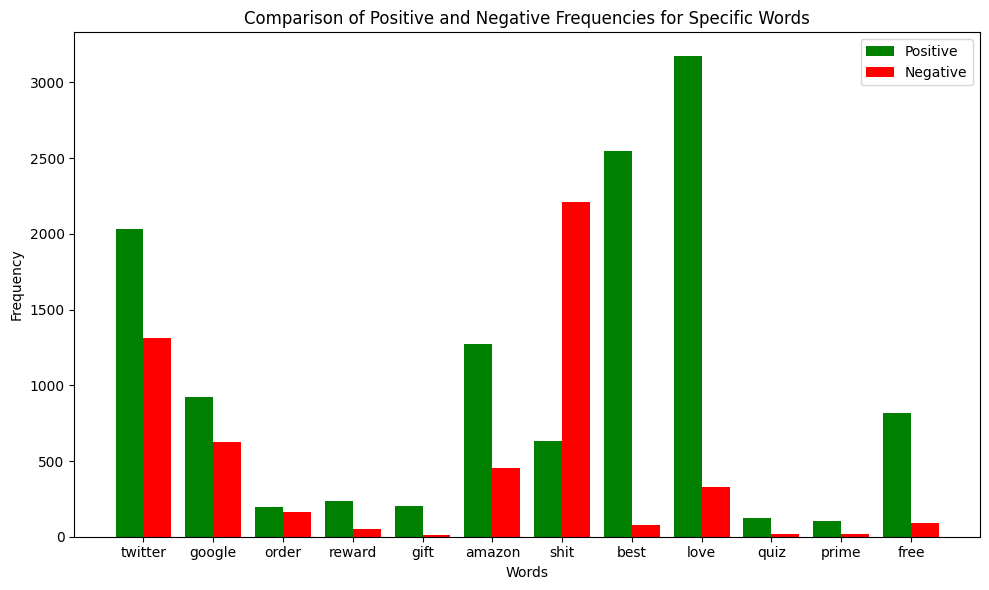

In [ ]:
#plotting the graph

# Set the figure size
plt.figure(figsize=(10, 6))

# Create bar positions for the words
x = range(len(df_frequencies_amazon))

# Plot the positive frequencies as blue bars
plt.bar(x,df_frequencies_amazon['Positive Frequency'], width=0.4, label='Positive', color='green')

# Plot the negative frequencies as red bars next to the positive bars
plt.bar([i + 0.4 for i in x], df_frequencies_amazon['Negative Frequency'], width=0.4, label='Negative', color='red')

# Set the x-axis labels to be the words
plt.xticks([i + 0.2 for i in x], df_frequencies_amazon['Word'])

# Set labels and title
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Comparison of Positive and Negative Frequencies for Specific Words')

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
most_frequent_words_google = find_most_frequent_words_in_category(df, 'Healthcare and Pharmaceuticals', 'johnson&johnson', top_n=50)

In [ ]:
print(most_frequent_words_google)

[('johnson', 2995), ('com', 626), ('powder', 511), ('baby', 479), ('vaccine', 469), ('talc', 299), ('company', 241), ('covid', 234), ('stop', 227), ('trial', 219), ('selling', 202), ('cancer', 193), ('based', 192), ('news', 182), ('canada', 173), ('product', 168), ('illness', 140), ('lawsuit', 132), ('people', 128), ('unexplained', 123), ('year', 118), ('make', 106), ('jnj', 106), ('good', 99), ('like', 95), ('twitter', 93), ('sale', 89), ('unk', 87), ('fuck', 82), ('johnso', 80), ('study', 80), ('participant', 78), ('million', 77), ('say', 73), ('business', 71), ('patient', 71), ('joh', 70), ('health', 69), ('shit', 69), ('new', 66), ('trust', 66), ('want', 65), ('halt', 64), ('great', 63), ('going', 62), ('woman', 62), ('pic', 61), ('skin', 60), ('paused', 58), ('coronavirus', 58)]


In [ ]:
words_johnson=analyze_tweets_by_frequency(most_frequent_words_google, df)

Word: johnson, Positive Frequency: 975, Negative Frequency: 692


In [ ]:
print(words_johnson)

{'johnson': {'Positive': 975, 'Negative': 692}, 'com': {'Positive': 4728, 'Negative': 2554}, 'powder': {'Positive': 117, 'Negative': 86}, 'baby': {'Positive': 245, 'Negative': 111}, 'vaccine': {'Positive': 143, 'Negative': 223}, 'talc': {'Positive': 72, 'Negative': 37}, 'company': {'Positive': 375, 'Negative': 297}, 'covid': {'Positive': 149, 'Negative': 157}, 'stop': {'Positive': 286, 'Negative': 455}, 'trial': {'Positive': 63, 'Negative': 160}, 'selling': {'Positive': 81, 'Negative': 103}, 'cancer': {'Positive': 65, 'Negative': 34}, 'based': {'Positive': 115, 'Negative': 75}, 'news': {'Positive': 591, 'Negative': 357}, 'canada': {'Positive': 36, 'Negative': 28}, 'product': {'Positive': 208, 'Negative': 118}, 'illness': {'Positive': 26, 'Negative': 111}, 'lawsuit': {'Positive': 69, 'Negative': 54}, 'people': {'Positive': 1256, 'Negative': 1172}, 'unexplained': {'Positive': 19, 'Negative': 109}, 'year': {'Positive': 1198, 'Negative': 893}, 'make': {'Positive': 1167, 'Negative': 896}, '

In [ ]:
specific_words_google= "powder,canada,trust,coronavirus,talc,baby"